- Noun : 명사
- Verb : 동사
- Adjective : 형용사
- Josa : 조사
- Punctuation : 문장부호
- Pronoun : 대명사
- Determiner : 광형사
- Adverb : 부사
- Suffix : 접미사
- Unknwn: 미등록어

- Noun: 명사
- Verb: 동사
- Adjective: 형용사
- Determiner: 관형사
- Adverb: 부사
- Conjunction: 접속사
- Exclamation: 감탄사
- Josa: 조사
- PreEomi: 선어말어미
- Eomi: 어말어미
- Suffix: 접미사
- Punctuation: 구두점
- Foreign: 외국어, 한자 및 기타기호
- Alpha: 알파벳
- Number: 숫자
- Unknown: 미등록어
- KoreanParticle: 한글 입자
- Modifier: 수식어
- VerbPrefix: 동사 접두사
- Adjective: 형용사

In [55]:
from konlpy.tag import Okt

okt = Okt()
text = '나는 학교에 갔습니다'

## 형태소 단위로 나눔
#rst = okt.morphs(text)
rst = okt.morphs(text,stem=True) # stem 은 True로 하면 동사의 원형으로 변경됨
print(rst)
 
## 품사 태깅  (기본값: 튜플(단어,품사))
#rst = okt.pos(text)
#rst = okt.pos(text, stem=True)
rst = okt.pos(text, stem=True, join=True)  # join: 단어와 품사를 '/'로 연결
print(rst)

## 명사 추출
rst = okt.nouns(text)
print(rst)

## 정규화(텍스트 불펼요 부분 정리)
rst = okt.normalize("그래욬ㅋㅋㅋㅋ")
print(rst)

##어구(프레이즈) 특정한 의미를 지닌 단어들 모임
rst = okt.phrases('엄청난 폭우가 서울에 내렸습니다. 도로가 물에 잠겼어요')
print(rst)

['나', '는', '학교', '에', '가다']
['나/Noun', '는/Josa', '학교/Noun', '에/Josa', '가다/Verb']
['나', '학교']
그래요ㅋㅋㅋ
['엄청난 폭우', '서울', '도로', '폭우']


In [81]:
from konlpy.tag import Okt
okt = Okt()

text = "인공지능과 자연어처리 기술이 발전하고 있습니다. 인공 지능과 기계 학습도 중요합니다. 인공지능이 인공지능합니다."

tokens =text.split()
#print(tokens)

combined_nouns=[]
current_combined = ""

for token in tokens:
    nouns = okt.nouns(token)
    print(nouns)
    for noun in nouns:
        if current_combined:
            current_combined += noun
        else:
            current_combined = noun
        if not (current_combined and (nouns.index(noun) < len(nouns) -1)):
            combined_nouns.append(current_combined)
            current_combined = ""

if current_combined:
    combined_nouns.append(current_combined)

print(combined_nouns)

['인공', '지능']
['자연어', '처리']
['기술']
['발전']
[]
['인공']
['지능']
['기계']
['학습']
[]
['인공', '지능']
['인공', '지능']
['인공지능', '자연어처리', '기술', '발전', '인공', '지능', '기계', '학습', '인공지능', '인공지능']


## 워드클라우드

['인공지능', '현대', '기술', '핵심', '인공지능', '기술', '우리', '일상', '변화', '기계학습', '딥러닝', '인공지능', '분야', '데이터', '인공지능', '발전', '핵심', '동력', '기술', '발전', '기회', '제공']
{'기계학습': 1, '기술': 3, '기회': 1, '데이터': 1, '동력': 1, '딥러닝': 1, '발전': 2, '변화': 1, '분야': 1, '우리': 1, '인공지능': 4, '일상': 1, '제공': 1, '핵심': 2, '현대': 1}


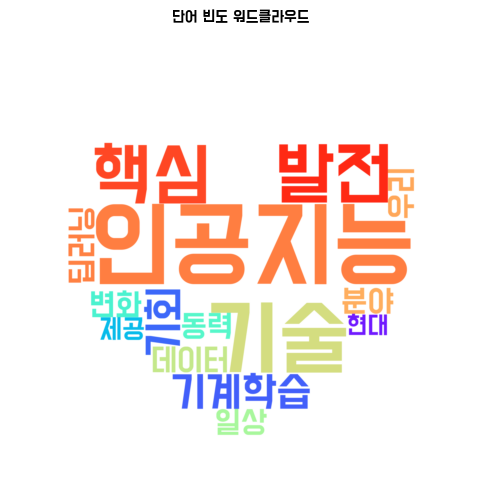

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image

def get_compound_nouns(text):

    okt = Okt()
    tokens = text.split()
    combined_nouns = []
    current_combined = ""

    for token in tokens:
        nouns = okt.nouns(token)

        for noun in nouns:
            if current_combined:
                current_combined += noun
            else:
                current_combined = noun

            if not (current_combined and (nouns.index(noun) < len(nouns) - 1)):
                combined_nouns.append(current_combined)
                current_combined = ""

    if current_combined:
        combined_nouns.append(current_combined)

    return combined_nouns
## 한글 세팅(워드클라우드, 맵플로립)
fontpath = "C:\\Users\\sj606\\Downloads\\fonts\\DoHyeon-Regular.ttf"
font_manager.fontManager.addfont(fontpath)
plt.rc('font',family='Do Hyeon')
plt.rcParams['axes.unicode_minus'] = False

text = """인공지능은 현대 기술의 핵심입니다. 
인공지능 기술은 우리의 일상을 변화시키고 있습니다.
기계학습과 딥러닝은 인공지능의 중요한 분야입니다.
데이터는 인공지능 발전의 핵심 동력입니다.
기술의 발전은 새로운 기회를 제공합니다."""

words = get_compound_nouns(text)

print(words)

unique_words, counts = np.unique(words,return_counts=True)
freq = dict(zip(unique_words,counts))

print(freq)

mask_image = np.array(Image.open('heart.jpg'))

wordcloud =WordCloud(width=800, height=400,
                    background_color='white',
                    font_path= fontpath,
                     mask=mask_image,
                     contour_color ="white",
                     contour_width=1,
                    colormap='rainbow').generate_from_frequencies(freq)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("단어 빈도 워드클라우드")
plt.show()

뉴스 헤드라인: ["마트 '달걀' 매대 텅 비었다…초유의 상황에 '비명' [한경제의 신선한 경제]", '[속보] 경찰 특수단 "尹 체포영장 검토…청장, 비화폰으로 계엄 당일 소통"', '"멀쩡한 걸 왜 부순대요?"…100억 들인 속초 랜드마크 \'비상\' [혈세 누수 탐지기㉒]', '"윤석열 씨? 난 이재명 씨라고도 안 해"…윤상현의 \'질타\'', '한동훈, ‘별의 순간’ 잡는 듯 했으나…', '조국의 시간, 2년 멈췄다', '귀신이 세상과 작별하는 방법', '[전문] 尹 “비상계엄 조치는 대통령의 고도의 정치적 판단”', '탄핵을 ‘광란의 칼춤’이라는 尹… 국회, 탄핵 초읽기', '‘尹 내란 수괴’ 검·경·공 수사 속도전… “국회의원 체포·주요 기관 장악” 지시 정황', '탄핵 집회 밝힌 아이돌 응원봉', '입시비리·감찰무마 조국 징역 2년 확정… 며칠 뒤 수감', '여의도 카톡 먹통 대비, ‘브릿지파이’ 미리 설치하세요', '‘소방관’ 곽경택 감독 호소 “동생의 투표 불참, 나도 실망했다”', '"윤석열, 레임덕 넘어 권력 공백 상태"…외신이 경고한 한국 상황', '‘찬성 vs 반대’… 대통령 탄핵 놓고 인천 시민단체 ‘분열’ 우려', '[속보] ‘선관위에 경찰 배치’ 경기남부경찰청 압수수색', '[단독] ‘이재명 무죄 판사 체포지시’에 판사들 분노...“윤석열은 사법부에 사죄하라”', '[단독]관용차 타고 삼청동 회동 가놓고 “계엄 몰랐다”한 서울경찰청장', '尹 지지율 11% 역대 최저 또 갈아치워…75% “탄핵 찬성”', "Defiant Yoon says he will face impeachment vote head on, accuses 'frenzied' opposition of 'paralyzing state affairs'", 'Ex-defense minister’s ‘secret phone’ discovered in joint probe', "PPP chief says Yoon's speech a 'confession of insurrecti

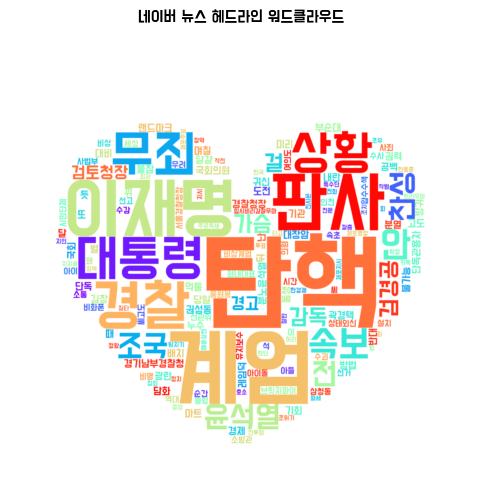

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager
from wordcloud import WordCloud
from konlpy.tag import Okt
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By

class WebScraper:
    def __init__(self):
        self.options = webdriver.ChromeOptions()
        self.options.add_argument('--headless')  # 브라우저 창을 띄우지 않음
        self.options.add_argument('--no-sandbox')
        self.options.add_argument('--disable-dev-shm-usage')

    def create_driver(self):
        return webdriver.Chrome(options=self.options)

    def scrape_naver_headline(self):
        driver = self.create_driver()
        try:
            driver.get('https://news.naver.com')
            items = driver.find_elements(By.CSS_SELECTOR, 'a._editn_link')[:30]  # 상위 0개 뉴스만 가져옴
            return [item.text.strip() for item in items if item.text.strip()]
        finally:
            driver.quit()

# 명사 추출 함수
def get_compound_nouns(text):
    okt = Okt()
    tokens = text.split()
    combined_nouns = []
    current_combined = ""

    for token in tokens:
        nouns = okt.nouns(token)

        for noun in nouns:
            if current_combined:
                current_combined += noun
            else:
                current_combined = noun

            if not (current_combined and (nouns.index(noun) < len(nouns) - 1)):
                combined_nouns.append(current_combined)
                current_combined = ""

    if current_combined:
        combined_nouns.append(current_combined)

    return combined_nouns

# 한글 폰트 설정
font_path = r"C:\\Users\\sj606\\Downloads\\fonts\\DoHyeon-Regular.ttf"  # 폰트 경로
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='Do Hyeon')
plt.rcParams['axes.unicode_minus'] = False

# 웹 스크래핑 수행
scp = WebScraper()
headlines = scp.scrape_naver_headline()

# 뉴스 제목을 하나의 문자열로 결합
text = " ".join(headlines)
print("뉴스 헤드라인:", headlines)

# 명사 추출 및 빈도 계산
words = get_compound_nouns(text)
unique_words, counts = np.unique(words, return_counts=True)
freq = dict(zip(unique_words, counts))
print("단어 빈도:", freq)

# 워드클라우드 생성
mask_image = np.array(Image.open('heart.jpg'))  # heart.jpg는 실행 경로에 있어야 함
wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    font_path=font_path,
    mask=mask_image,
    contour_color="white",
    contour_width=1,
    colormap='rainbow'
).generate_from_frequencies(freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("네이버 뉴스 헤드라인 워드클라우드")
plt.savefig("워드클라우드.png",bbox_inches="tight")
plt.show()


## okt 품사별 단어 추출

In [166]:
from konlpy.tag import Okt
okt = Okt()
text = '엄청난 폭우가 서울에 내렸습니다. 도로가 물에 잠겼어요ㅠㅠ'

tagged = okt.pos(text, stem=True)
print(tagged)
print("-" * 100)
verbs = [word for word, pos in tagged if pos=='Verb']
print("동사:",verbs)

Adjective = [word for word, pos in tagged if pos=='Adjective']
print("형용사:",Adjective)

Adverb = [word for word, pos in tagged if pos=='Adverb']
print("부사:",Adverb)

Josa = [word for word, pos in tagged if pos=='Josa']
print("조사:",Josa)

[('엄청나다', 'Adjective'), ('폭우', 'Noun'), ('가', 'Josa'), ('서울', 'Noun'), ('에', 'Josa'), ('내리다', 'Verb'), ('.', 'Punctuation'), ('도로', 'Noun'), ('가', 'Josa'), ('물', 'Noun'), ('에', 'Josa'), ('잠기다', 'Verb'), ('ㅠㅠ', 'KoreanParticle')]
----------------------------------------------------------------------------------------------------
동사: ['내리다', '잠기다']
형용사: ['엄청나다']
부사: []
조사: ['가', '에', '가', '에']


## okt.normalize

In [178]:
from konlpy.tag import Okt
okt = Okt()

# 축약어 정규화
text1 ="그래욬ㅋㅋㅋ"
print(okt.normalize(text1))

# 반복 문자 정규화
text2 = "침짜aaaaaa완전완전완전귀엽다!!!!!"
print(okt.normalize(text2))

# 이모티콘 정규화
text3 = "앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ웃겨요ㅎㅎㅎㅎ"
print(okt.normalize(text3))

# 복합적인 예시
text4 = "안녕하세욬ㅋㅋㅋㅋㅋ완전 좋아요!!!"
print(okt.normalize(text4))

그래요ㅋㅋㅋ
침짜aaaaaa완전완전귀엽다!!!!!
아ㅋㅋㅋ웃겨요ㅎㅎㅎ
안녕하세요ㅋㅋㅋ완전 좋아요!!!
